# Project: Writing a Data Scientist Blog Post #

## 1) Business Understanding ##

I was interested in leveraging 2017 Stack Overflow data for this study in order to have a better understanding of:

a) Which 10 nations are the highest ranking in the survey? and what kind of jobs do they have professionally? <br>
b) Which nations are the most welcoming of remote work? <br>
c) In what ways are work satisfaction, career happiness, and stackoverflow distributed? What insights does this distribution offer?

In [153]:
#import libraries
import numpy as np
import pandas as pd
import pylab as pl
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import Series, DataFrame
import warnings
warnings.filterwarnings('ignore')

## 2) Data Understanding ##

In [154]:
#Reading the data
survey_df = pd.read_csv('survey_results_public.csv')
survey_df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [155]:
#To help us comprehend the data we have, the following cells verify the number of columns, missing values, etc.
survey_info = pd.read_csv('survey_results_schema.csv')
survey_info.head()

,Column,Question
0,Respondent,Respondent ID number
1,Professional,Which of the following best describes you?
2,ProgramHobby,Do you program as a hobby or contribute to ope...
3,Country,In which country do you currently live?
4,University,"Are you currently enrolled in a formal, degree..."


In [156]:
survey_df.describe()

,Respondent,CareerSatisfaction,JobSatisfaction,HoursPerWeek,StackOverflowSatisfaction,Salary,ExpectedSalary
count,51392.000000,42695.000000,40376.000000,20600.000000,36592.000000,12891.000000,2566.000000
mean,25696.500000,7.300574,6.957078,3.952282,8.429875,56298.480641,33142.220468
std,14835.736854,1.955444,2.167652,7.564722,1.390635,39880.905277,30162.988829
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12848.750000,6.000000,6.000000,1.000000,8.000000,26440.371839,4490.492484
50%,25696.500000,8.000000,7.000000,1.000000,9.000000,50000.000000,29364.263691
75%,38544.250000,9.000000,8.000000,4.000000,10.000000,80000.000000,50403.225806
max,51392.000000,10.000000,10.000000,40.000000,10.000000,197000.000000,187500.000000


In [157]:
num_row= survey_df.shape[0]
num_col= survey_df.shape[1]
print("Total number of rows is {}".format(num_row))
print("Total number of columns is {}".format(num_col))

Total number of rows is 51392
Total number of columns is 154


In [158]:
survey_df.isnull().sum()

Respondent                  0
Professional                0
ProgramHobby                0
Country                     0
University                  0
                        ...  
QuestionsInteresting    16856
QuestionsConfusing      16973
InterestedAnswers       16780
Salary                  38501
ExpectedSalary          48826
Length: 154, dtype: int64

## 3) Data preparation ##

<b> For preparing the data we have to apply the subsequent actions: <br> </b>
1) Delete extraneous data <br>
2) Convert spring to numeric numbers; <br>
3) address empty values <br>

In [159]:
col_to_drop=['Respondent','ProgramHobby','YearsProgram','YearsCodedJob','YearsCodedJobPast','DeveloperType','WebDeveloperType','MobileDeveloperType',
'NonDeveloperType','ExCoderReturn','ExCoderNotForMe','ExCoderBalance','ExCoder10Years','ExCoderBelonged','ExCoderSkills','ExCoderWillNotCode',
'ExCoderActive','ProblemSolving','BuildingThings','LearningNewTech','BoringDetails','JobSecurity','DiversityImportant','AnnoyingUI','FriendsDevelopers',
'RightWrongWay','UnderstandComputers','SeriousWork','InvestTimeTools','WorkPayCare','KinshipDevelopers','ChallengeMyself','CompetePeers','ChangeWorld','JobSeekingStatus',
'HoursPerWeek','LastNewJob','AssessJobIndustry','AssessJobRole','AssessJobExp','AssessJobDept','AssessJobTech','AssessJobProjects','AssessJobCompensation','AssessJobOffice',
'AssessJobCommute','AssessJobRemote','AssessJobLeaders','AssessJobProfDevel','AssessJobDiversity','AssessJobProduct','AssessJobFinances','ImportantBenefits',
'ClickyKeys','JobProfile','ResumePrompted','LearnedHiring','ImportantHiringAlgorithms','ImportantHiringTechExp','ImportantHiringCommunication','ImportantHiringOpenSource',
'ImportantHiringPMExp','ImportantHiringCompanies','ImportantHiringTitles','ImportantHiringEducation','ImportantHiringRep','ImportantHiringGettingThingsDone','Currency',
'Overpaid','TabsSpaces','EducationImportant','EducationTypes','SelfTaughtTypes','TimeAfterBootcamp','CousinEducation','WorkStart','HaveWorkedLanguage','WantWorkLanguage',
'HaveWorkedFramework','WantWorkFramework','HaveWorkedDatabase','WantWorkDatabase','HaveWorkedPlatform','WantWorkPlatform','IDE','AuditoryEnvironment','Methodology',
'VersionControl','CheckInCode','ShipIt','OtherPeoplesCode','ProjectManagement','EnjoyDebugging','InTheZone','DifficultCommunication','CollaborateRemote',
'MetricAssess','EquipmentSatisfiedMonitors','EquipmentSatisfiedCPU','EquipmentSatisfiedRAM','EquipmentSatisfiedStorage','EquipmentSatisfiedRW','InfluenceInternet',  
'InfluenceWorkstation','InfluenceHardware','InfluenceServers','InfluenceTechStack','InfluenceDeptTech','InfluenceVizTools','InfluenceDatabase','InfluenceCloud','InfluenceConsultants',
'InfluenceRecruitment','InfluenceCommunication','HighestEducationParents','Race','SurveyLong','QuestionsInteresting','QuestionsConfusing','InterestedAnswers']
survey_df.drop(col_to_drop,axis=1,inplace=True)

In [160]:
survey_df.head()

,Professional,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,CompanyType,CareerSatisfaction,...,StackOverflowAdsDistracting,StackOverflowModeration,StackOverflowCommunity,StackOverflowHelpful,StackOverflowBetter,StackOverflowWhatDo,StackOverflowMakeMoney,Gender,Salary,ExpectedSalary
0,Student,United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,NaN,NaN,...,Strongly disagree,Strongly disagree,Strongly agree,Agree,Strongly agree,Strongly agree,Strongly disagree,Male,NaN,NaN
1,Student,United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,"Privately-held limited company, not in startup...",NaN,...,Strongly disagree,Strongly disagree,Strongly agree,Agree,Strongly agree,Strongly agree,Strongly disagree,Male,NaN,37500.0
2,Professional developer,United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",Publicly-traded corporation,8.0,...,Disagree,Strongly disagree,Strongly agree,Agree,Agree,Agree,Disagree,Male,113750.0,NaN
3,Professional non-developer who sometimes write...,United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",Non-profit/non-governmental organization or pr...,6.0,...,Strongly disagree,Strongly disagree,Strongly agree,Strongly agree,Agree,Strongly agree,Disagree,Male,NaN,NaN
4,Professional developer,Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,"Privately-held limited company, not in startup...",6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


   ### Analyze, Model, and Visualize #### 

##### Question 1: Which 10 nations are the highest ranking in the survey? and what kind of jobs do they have professionally?

In [161]:
#picking the top ten nations where the survey is being conducted.

top_country=survey_df['Country'].value_counts()
top_ten=top_country.head(10)
print(top_ten)

United States         11455
India                  5197
United Kingdom         4395
Germany                4143
Canada                 2233
France                 1740
Poland                 1290
Australia               913
Russian Federation      873
Spain                   864
Name: Country, dtype: int64


In [162]:
#understanding the variety of responses that are featured in the "Professional" category.

top_professional= survey_df['Professional'].value_counts()
print(top_professional.head())
index=['Professional developer','Student','Professional non-developer who sometimes writes code','Used to be a professional developer','None of these']

Professional developer                                  36131
Student                                                  8224
Professional non-developer who sometimes writes code     5140
Used to be a professional developer                       983
None of these                                             914
Name: Professional, dtype: int64


Professional developer                                  8310
Student                                                 1456
Professional non-developer who sometimes writes code    1199
None of these                                            247
Used to be a professional developer                      243
Name: Professional, dtype: int64

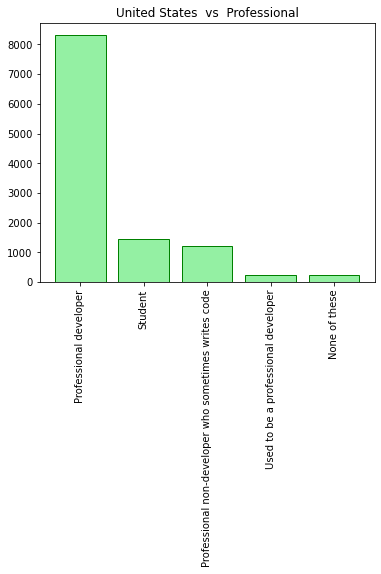

In [163]:
#distribution of Professional and USA
usa_professionals=survey_df['Professional'][survey_df['Country']=='United States']
num_usa=usa_professionals.value_counts()
plt.xticks(rotation='90')
plt.title('United States  vs  Professional')
plt.bar(index,num_usa,color=(0.3,0.9,0.4,0.6),edgecolor='green')
plt.subplots_adjust(bottom= 0.6, top = 1.5)
num_usa

Professional developer                                  3438
Student                                                 1162
Professional non-developer who sometimes writes code     439
Used to be a professional developer                      104
None of these                                             54
Name: Professional, dtype: int64

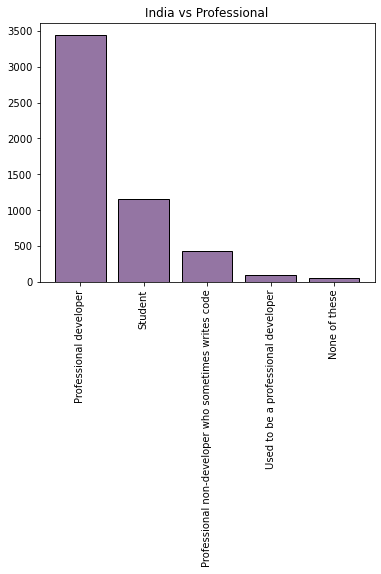

In [164]:
#distribution of Professional and India
india_professional=survey_df['Professional'][survey_df['Country']=='India']
num_india=india_professional.value_counts()
plt.xticks(rotation='90')
plt.title('India vs Professional')
plt.bar(index,num_india, color=(00.3,0.1,0.4,0.6),edgecolor='black')
plt.subplots_adjust(bottom= 0.6, top = 1.5)
num_india

Professional developer                                  3302
Student                                                  530
Professional non-developer who sometimes writes code     405
None of these                                             82
Used to be a professional developer                       76
Name: Professional, dtype: int64

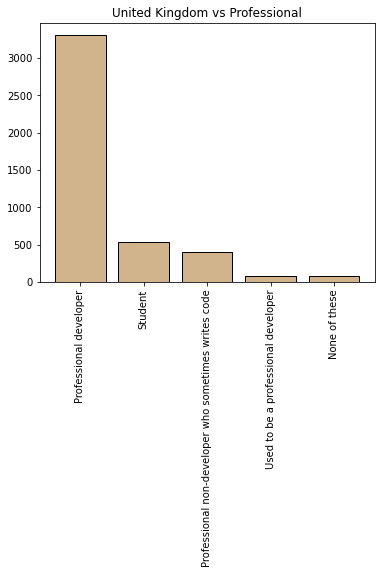

In [165]:
#distribution of Professional and United Kingsom
uk_professional=survey_df['Professional'][survey_df['Country']=='United Kingdom']
num_uk=uk_professional.value_counts()
plt.xticks(rotation='90')
plt.title('United Kingdom vs Professional')
plt.bar(index,num_uk, color=('tan'),edgecolor='black')
plt.subplots_adjust(bottom= 0.6, top = 1.5)
num_uk

Professional developer                                  2767
Student                                                  731
Professional non-developer who sometimes writes code     493
None of these                                             91
Used to be a professional developer                       61
Name: Professional, dtype: int64

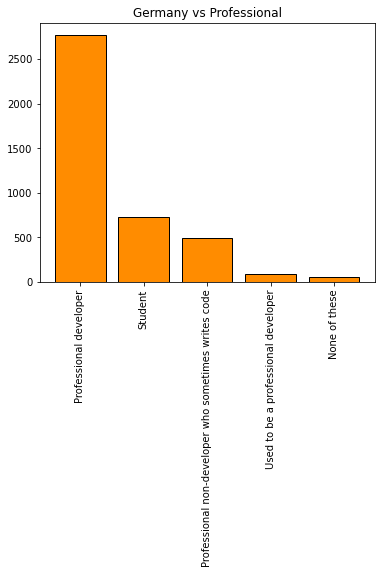

In [166]:
#distribution of Professional and Germany
ger_professionals=survey_df['Professional'][survey_df['Country']=='Germany']
num_ger=ger_professionals.value_counts()
plt.xticks(rotation='90')
plt.title('Germany vs Professional')
plt.bar(index,num_ger,color=('darkorange'),edgecolor='black')
plt.subplots_adjust(bottom= 0.6, top = 1.5)
num_ger

Professional developer                                  1605
Student                                                  355
Professional non-developer who sometimes writes code     186
Used to be a professional developer                       52
None of these                                             35
Name: Professional, dtype: int64

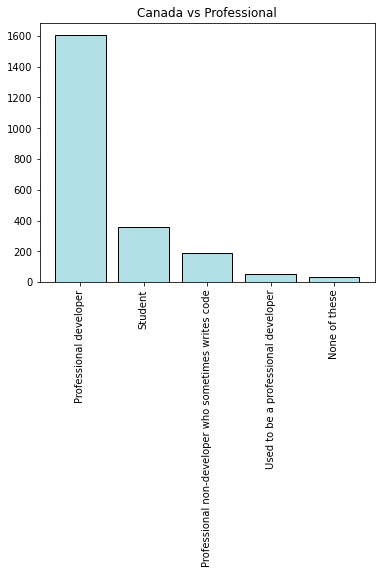

In [167]:
#distribution of Professional and Canada
can_professionals=survey_df['Professional'][survey_df['Country']=='Canada']
num_can= can_professionals.value_counts()
plt.xticks(rotation='90')
plt.title('Canada vs Professional')
plt.bar(index,num_can, color=('powderblue'),edgecolor='black')
plt.subplots_adjust(bottom= 0.6, top = 1.5)
num_can

Professional developer                                  1246
Student                                                  322
Professional non-developer who sometimes writes code     119
Used to be a professional developer                       35
None of these                                             18
Name: Professional, dtype: int64

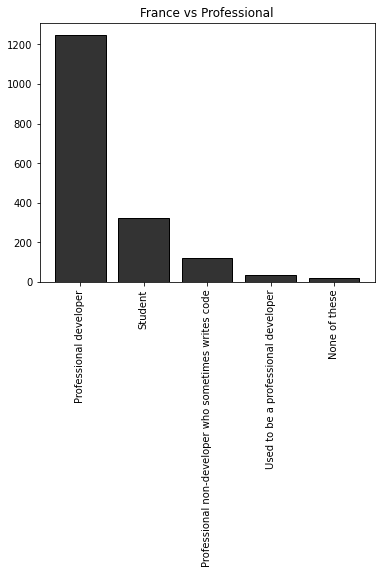

In [168]:
#distribution of Professional and France
fra_professionals=survey_df['Professional'][survey_df['Country']=='France']
num_fra= fra_professionals.value_counts()
plt.xticks(rotation='90')
plt.title('France vs Professional')
plt.bar(index,num_fra, color=('0.2'),edgecolor='black')
plt.subplots_adjust(bottom= 0.6, top = 1.5)
num_fra

Professional developer                                  954
Student                                                 188
Professional non-developer who sometimes writes code    116
Used to be a professional developer                      16
None of these                                            16
Name: Professional, dtype: int64

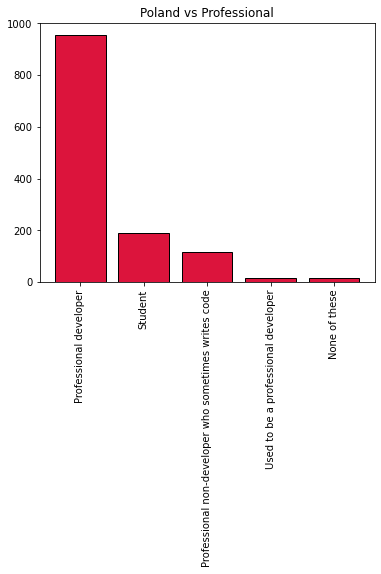

In [169]:
#distribution of Professional and Poland
pol_professionals=survey_df['Professional'][survey_df['Country']=='Poland']
num_pol= pol_professionals.value_counts()
plt.xticks(rotation='90')
plt.title('Poland vs Professional')
plt.bar(index,num_pol, color=('crimson'),edgecolor='black')
plt.subplots_adjust(bottom= 0.6, top = 1.5)
num_pol

Professional developer                                  643
Professional non-developer who sometimes writes code    112
Student                                                 111
Used to be a professional developer                      25
None of these                                            22
Name: Professional, dtype: int64

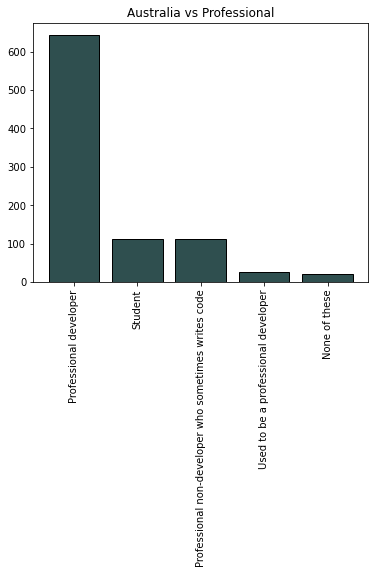

In [170]:
#distribution of Professional and Australia
aus_professionals=survey_df['Professional'][survey_df['Country']=='Australia']
num_aus= aus_professionals.value_counts()
plt.xticks(rotation='90')
plt.title('Australia vs Professional')
plt.bar(index,num_aus, color=('darkslategrey'),edgecolor='black')
plt.subplots_adjust(bottom= 0.6, top = 1.5)
num_aus

Professional developer                                  631
Student                                                 108
Professional non-developer who sometimes writes code    106
Used to be a professional developer                      14
None of these                                            14
Name: Professional, dtype: int64

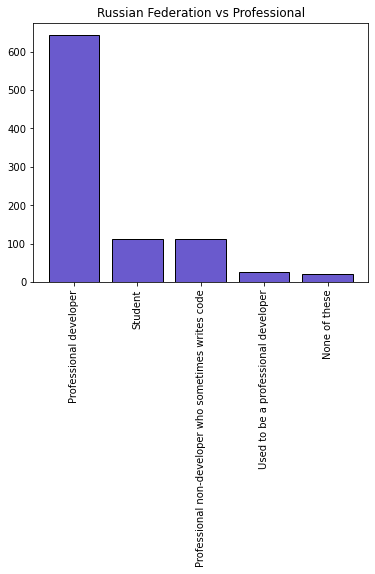

In [171]:
#distribution of Professional and Russian Federation
rus_professionals=survey_df['Professional'][survey_df['Country']=='Russian Federation']
num_rus= rus_professionals.value_counts()
plt.xticks(rotation='90')
plt.title('Russian Federation vs Professional')
plt.bar(index,num_aus, color=('slateblue'),edgecolor='black')
plt.subplots_adjust(bottom= 0.6, top = 1.5)
num_rus

Professional developer                                  688
Professional non-developer who sometimes writes code     77
Student                                                  76
Used to be a professional developer                      14
None of these                                             9
Name: Professional, dtype: int64

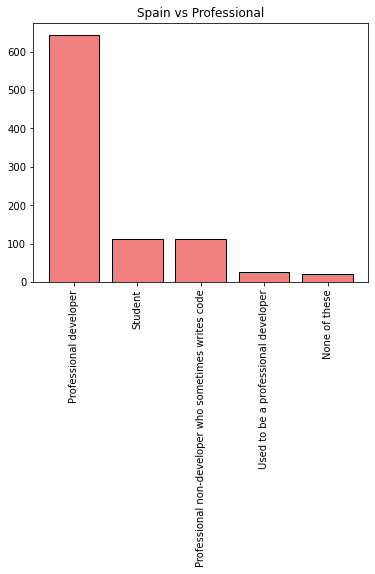

In [172]:
#distribution of Professional and Spain
spa_professionals=survey_df['Professional'][survey_df['Country']=='Spain']
num_spa= spa_professionals.value_counts()
plt.xticks(rotation='90')
plt.title('Spain vs Professional')
plt.bar(index,num_aus, color=('lightcoral'),edgecolor='black')
plt.subplots_adjust(bottom= 0.6, top = 1.5)
num_spa

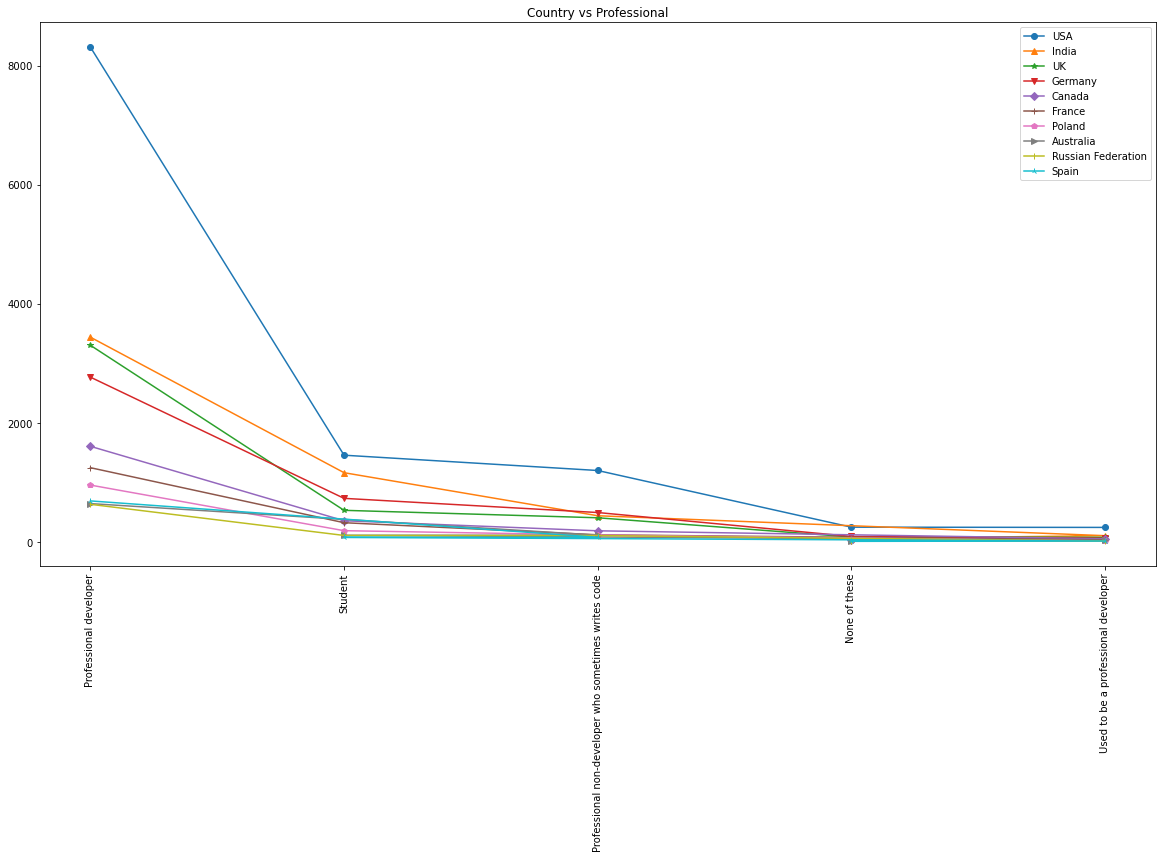

In [173]:
# put five countries' info together
plt.figure(figsize=(20,10))
plt.plot(num_usa,label='USA',marker='o')
plt.plot(num_india,label='India',marker='^')
plt.plot(num_uk,label='UK',marker='*')
plt.plot(num_ger,label='Germany',marker='v')
plt.plot(num_can,label='Canada',marker='D')
plt.plot(num_fra,label='France',marker='+')
plt.plot(num_pol,label='Poland',marker='p')
plt.plot(num_aus,label='Australia',marker='>')
plt.plot(num_rus,label='Russian Federation',marker='|')
plt.plot(num_spa,label='Spain',marker='2')
plt.xticks(rotation='90')
plt.title('Country vs Professional')
plt.legend()
plt.show()

The numbers above show that the majority of stackoverflow users, particularly skilled developers, are always found in the USA. <br>
While professional developers in Canada, Poland, Australia, Russia and spain are under 2000, those in India, the UK, and Germany are around between 3000 and 4000. There are comparable numbers of former professional developers in each of the five countries.

##### Question 2. Which nations are the most welcoming of remote work?

I am doing the following to answer tha above question <br>
1) Examine the Country and HomeRemote columns. <br>
2) Determine the proportion of respondents who work from home in each nation.<br>
3) Make a bar plot to display the outcomes.

The data for the 2nd question is prepared in the following cells. New feature columns are created, missing values are addressed, and the data are cleansed. <br>

The Country column has no missing values. <br>
Using the following logic, a new column called WorkFromHome is generated based on a categorical variable called HomeRemote:<br>

True: "Approximately 50% of the time," "Almost 100% of the time (I work remotely full-time")," "More than 50% of the time, but not 100% of the time," and "Less than 50% of the time, but at least one day per week" <br>

False: 'Never', 'A few days per month', or missing values are invalid 

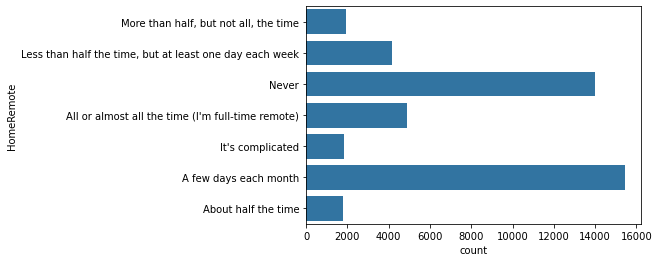

In [174]:
sns.countplot(data = survey_df, y = 'HomeRemote', color=sns.color_palette()[0]);

In [175]:
#Drop the row if it has NaN in HomeRemote or Country column
df_wfh = survey_df.dropna(axis=0, subset=['Country', "HomeRemote"])

In [176]:
#Drop the row if it has It's complicated in HomeRemote
df_wfh = df_wfh[df_wfh['HomeRemote'] != "It's complicated"]

In [177]:
df_wfh['HomeRemote'].unique()

array(['More than half, but not all, the time',
       'Less than half the time, but at least one day each week', 'Never',
       "All or almost all the time (I'm full-time remote)",
       'A few days each month', 'About half the time'], dtype=object)

In [178]:
#Drop the rows if the country has less than 300 respondents
country_count = df_wfh['Country'].value_counts()
country_count = country_count[country_count>=300]
country_keep = list(country_count.index)

In [179]:
df_wfh = df_wfh[df_wfh['Country'].isin(country_keep)]

In [180]:
df_wfh['WorkFromHome'] =  df_wfh['HomeRemote'].isin (['About half the time', 
                                                     "All or almost all the time (I'm full-time remote)",
                                                     "More than half, but not all, the time",
                                                     "Less than half the time, but at least one day each week"])

Analyzing Question 2

In [181]:
country_wfh = df_wfh.groupby(['Country'])['WorkFromHome'].mean().sort_values(ascending = False)

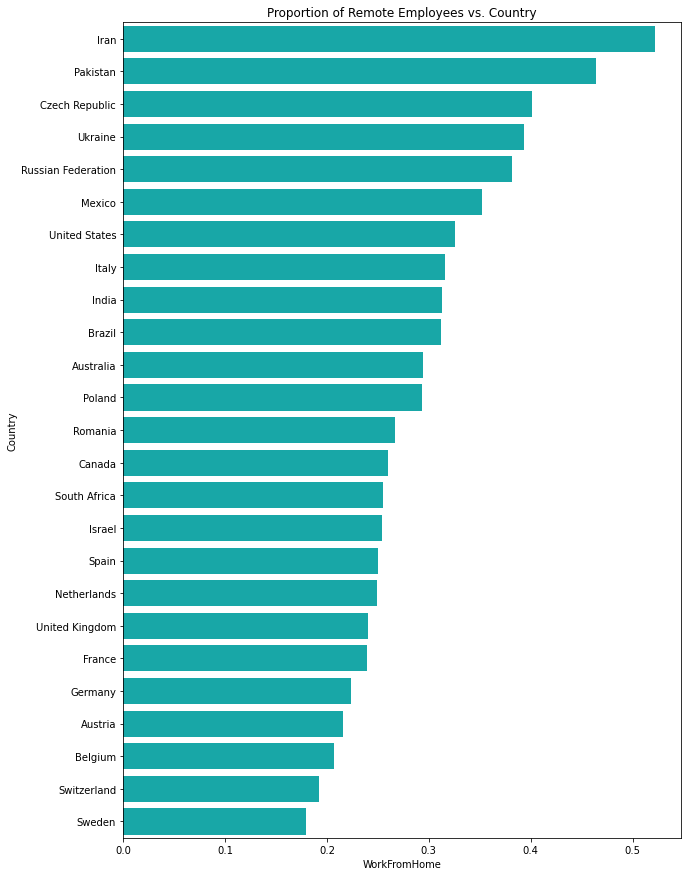

In [182]:
plt.figure(figsize=[10,15])
sns.barplot(y=country_wfh.index, x=country_wfh, color= 'coral'[0])
plt.title("Proportion of Remote Employees vs. Country"); 

In [183]:
df_wfh['WorkFromHome'].mean()

0.28938963284203123

Developers in Iran, Pakistan, the Czech Republic, Ukraine, and the Russian Federation are more likely to work from home.

##### Question 3: In what ways are work satisfaction, career happiness, and stack overflow distributed? What insights does this distribution offer?

8.0     10227
9.0      9792
10.0     9166
7.0      4724
6.0      1456
5.0       716
4.0       202
3.0       162
2.0        73
1.0        38
0.0        36
Name: StackOverflowSatisfaction, dtype: int64

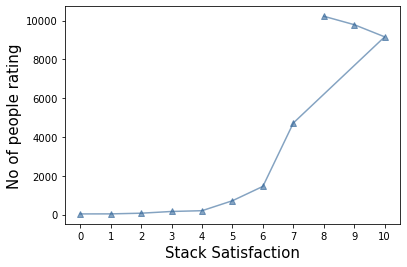

In [184]:
stack_satisfaction=survey_df['StackOverflowSatisfaction'].value_counts()
xtick=np.arange(0,15,1)
plt.xticks(xtick)
plt.xlabel('Stack Satisfaction',fontsize='15')
plt.ylabel('No of people rating',fontsize='15')
plt.plot(stack_satisfaction, marker='^', color= (0.2, 0.4, 0.6, 0.6))
stack_satisfaction

8.0     8983
7.0     7969
9.0     5573
6.0     4726
10.0    4148
5.0     3749
4.0     1865
3.0     1635
2.0      888
0.0      467
1.0      373
Name: JobSatisfaction, dtype: int64

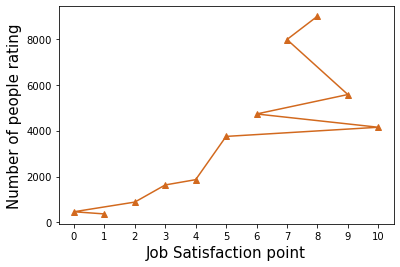

In [185]:
job_satisfaction= survey_df['JobSatisfaction'].value_counts()
xtick=np.arange(0,15,1)
plt.xticks(xtick)
plt.xlabel('Job Satisfaction point',fontsize='15')
plt.ylabel('Number of people rating',fontsize='15')
plt.plot(job_satisfaction, marker='^', color= 'chocolate')
job_satisfaction

8.0     11037
7.0      9384
9.0      5579
10.0     5408
6.0      4721
5.0      3070
4.0      1352
3.0      1046
2.0       495
0.0       392
1.0       211
Name: CareerSatisfaction, dtype: int64

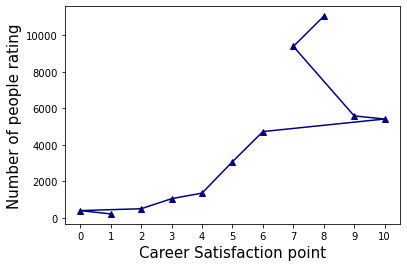

In [186]:
career_satisfaction= survey_df['CareerSatisfaction'].value_counts()
xtick=np.arange(0,15,1)
fig=plt.figure()
ax1=fig.add_subplot(111)
ax1.set_xticks(xtick)
ax1.set_xlabel('Career Satisfaction point',fontsize='15')
ax1.set_ylabel('Number of people rating',fontsize='15')
ax1.plot(career_satisfaction, marker='^', color = "navy")
career_satisfaction

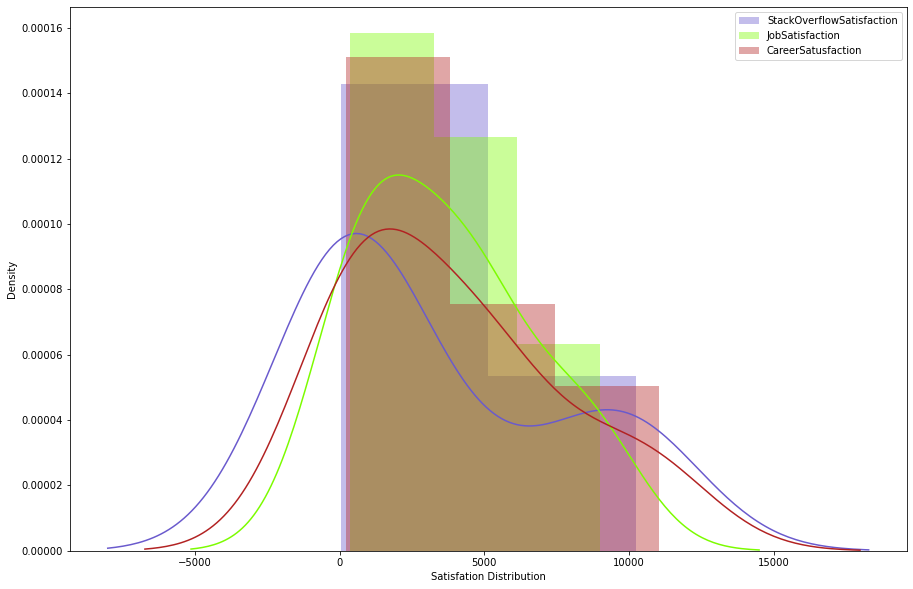

In [187]:
plt.figure(figsize=(15,10))
plt.xlabel('Satisfation Distribution')
sns.distplot(stack_satisfaction,label='StackOverflowSatisfaction',axlabel=False, color = 'slateblue')
sns.distplot(job_satisfaction,label='JobSatisfaction',axlabel=False, color = 'lawngreen')
sns.distplot(career_satisfaction,label='CareerSatusfaction',axlabel=False, color = 'firebrick')
plt.legend()

The satisfaction distribution density is depicted in the above graphic. Peaks can be found between 0 and 5000.Plots for each satisfaction category can be seen, and it is clear that career, job, and stackoverflow satisfaction are all above average. nearly 30,000 people expressed their satisfaction with stackoverflow; the majority of respondents gave an 8.0, and only about 3% offered a rating below average.We can therefore draw the conclusion that most people are happy with stackoverflow. The number of people conducting the job satisfaction study was approximately 40,000. Approximately 22% of respondents expressed dissatisfaction with their jobs, despite the fact that 8.0 is the highest grade possible. The career satisfaction study was completed by more than 40,000 people. Still, the majority scored their careers an 8.0, although 15% are not happy with where they are in their careers at the moment. <br>

While the top three represent the majority of each investigation, the KDE reveals that the density of ratings for the remaining points is higher than the top three. This indicates that some participants consistently select rating points other than the top three, resulting in peaks in the 0-5000 range.
